**AirQualityofBlackpool of December2023**

AQI analysis is a crucial aspect of environmental data science.It aims to provide a numerical value representative of overall airquality,essential for public health and environmental management.
Below are the steps we can follow for the task of AQI analysis:
    1.Gather airquality data from weather monitoring websites,satellite imagery etc.I have obtained the dataset from the U.K Air site(https://uk-air.defra.gov.uk/data/data_selector_service?show=auto&submit=Reset&f_limit_was=1).In this we can request for the data as per our requirements like we have the option to choose the data type,date range,monitoring sites,pollutants and the type of output we want.
    2.Clean and preprocess the collected data.
    3.Calculate the Air Quality Index using standardized formulas and guidelines provided by environmental agencies.
     Air Quality Index (AQI) involves multiple steps because it depends on specific concentration breakpoints for each pollutant. Here's a clear breakdown:

     
**Understanding AQI Calculation**
AQI is calculated for individual pollutants like PM2.5, PM10, Ozone, NO2, etc. The final AQI is the highest AQI value among all pollutants.

For each pollutant:
    

1.The concentration of the pollutant is compared to standardized breakpoints.

2.Using linear interpolation, an AQI value is calculated.
The formula for AQI calculation is:
            〖AQI〗_P=〖AQI〗_LOW+(C-C_LOW)/(C_HIGH-C_LOW )*(〖AQI〗_HIGH-〖AQI〗_LOW)


C: Pollutant concentration.
C_low and C_high: Breakpoints between which the concentration lies.
AQI_low and AQI_high: Corresponding AQI values for those breakpoints.

**Standard Breakpoints**
Here are the breakpoints for some common pollutants (based on UK and US EPA standards):


**PM2.5 (µg/m³)**
AQI	AQI Range	PM2.5 Concentration (µg/m³)
0	0-50	      0.0 - 12.0
1	51-100	      12.1 - 35.4
2	101-150	      35.5 - 55.4
3	151-200	      55.5 - 150.4
**PM10 (µg/m³)**
AQI	AQI Range	PM10 Concentration (µg/m³)
0	0-50	       0 - 54
1	51-100	       55 - 154
2	101-150	       155 - 254
3	151-200	       255 - 354
Ozone, NO2, and other pollutants also have their own breakpoint tables.

4.Create visualizations, such as line charts or heatmaps, to represent the AQI over time or across geographical regions.
5.Compare the AQI metrics of the location with the recommended air quality metrics.I have verified the result with a airquality monitoring site IQAir(https://www.iqair.com/uk/england/blackpool)

In [59]:
#pandas: For data manipulation (loading, cleaning, and analyzing).
#plotly.graph_objects (go): For creating customized plots by adding traces manually.
#plotly.express (px): For creating quick and beautiful plots with minimal code.
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [61]:
data = pd.read_csv("AirQualityDataHourlyCFG_Project.csv")
print(data.head(20))   
#Didn't have much scope for data cleaning

              Date&Time     Ozone  Nitric oxide  Nitrogen dioxide  \
0   2023-12-01 01:00:00  18.02782       0.68321          12.61468   
1   2023-12-01 02:00:00  20.35614       0.12057          10.64647   
2   2023-12-01 03:00:00  22.90066       0.60283           8.58386   
3   2023-12-01 04:00:00  21.15442       0.33156           9.92293   
4   2023-12-01 05:00:00  20.20646       0.87411          10.42957   
5   2023-12-01 06:00:00  20.85507       0.69326          10.47608   
6   2023-12-01 07:00:00  16.41463       1.32624          13.61344   
7   2023-12-01 08:00:00   7.58366      19.17013          29.45545   
8   2023-12-01 09:00:00   1.54667      77.19293          42.86300   
9   2023-12-01 10:00:00   5.63785      38.73210          37.17051   
10  2023-12-01 11:00:00   9.42968      27.70024          32.99239   
11  2023-12-01 12:00:00  13.96990      22.27473          30.46467   
12  2023-12-01 13:00:00  17.01334      16.45738          27.61463   
13  2023-12-01 14:00:00  29.78582 

In [63]:
#Parse Dates
data['Date&Time'] = pd.to_datetime(data['Date&Time'])

In [65]:
#Initialize the Figure
fig = go.Figure()

In [67]:
# Define Pollutants
pollutants = [
    'Ozone',
    'Nitric oxide',
    'Nitrogen dioxide',
    'PM10 particulate matter (Hourly measured)',
    'PM2.5 particulate matter (Hourly measured)'
]

In [51]:
#Add Data Traces
for pollutant in pollutants:
    fig.add_trace(go.Scatter(x=data['Date&Time'], y=data[pollutant], mode='lines', name=pollutant))

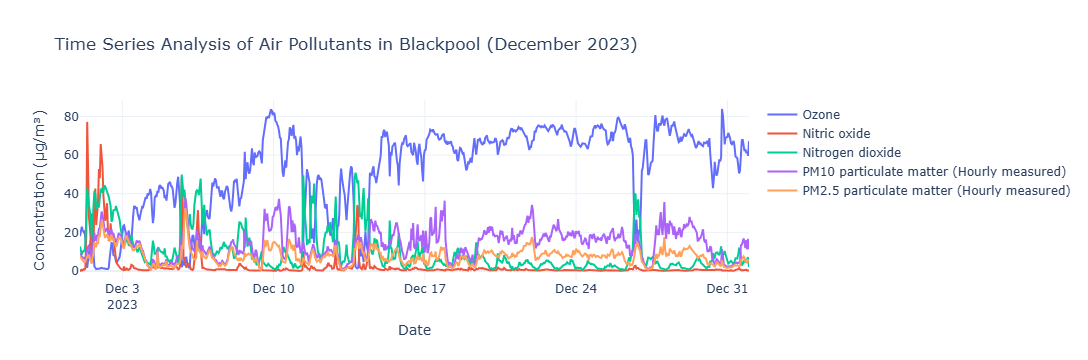

In [53]:
fig.update_layout(
    title='Time Series Analysis of Air Pollutants in Blackpool (December 2023)',
    xaxis_title='Date',
    yaxis_title='Concentration (µg/m³)',
    template='plotly_white'
)

In [55]:

# Define pollutant AQI breakpoints
aqi_breakpoints = {
    'PM2.5': [(0, 12, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200)],
    'PM10': [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200)],
    'Ozone': [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150), (86, 105, 151, 200)],
    'NO2': [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200)],
}

# Function to calculate AQI for a single pollutant
def calculate_aqi(concentration, breakpoints):
    for c_low, c_high, aqi_low, aqi_high in breakpoints:
        if c_low <= concentration <= c_high:
            return aqi_low + ((concentration - c_low)/ (c_high - c_low)) *(aqi_high - aqi_low)
    return None  # Return None if concentration is out of range


# Calculate AQI for each pollutant
aqi_columns = ['PM2.5', 'PM10', 'Ozone', 'Nitrogen dioxide']
aqi_results = []

for index, row in data.iterrows():
    aqi_values = []
    for pollutant, breakpoints in aqi_breakpoints.items():
        if pollutant in row and pd.notnull(row[pollutant]):
            aqi = calculate_aqi(row[pollutant], breakpoints)
            aqi_values.append(aqi if aqi is not None else 0)
    aqi_results.append(max(aqi_values))  # Use the maximum AQI value

# Add AQI to the data
data['AQI'] = aqi_results
# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

# Categorize AQI
data['AQI Category'] = data['AQI'].apply(categorize_aqi)
print(data.head())



            Date&Time     Ozone  Nitric oxide  Nitrogen dioxide  \
0 2023-12-01 01:00:00  18.02782       0.68321          12.61468   
1 2023-12-01 02:00:00  20.35614       0.12057          10.64647   
2 2023-12-01 03:00:00  22.90066       0.60283           8.58386   
3 2023-12-01 04:00:00  21.15442       0.33156           9.92293   
4 2023-12-01 05:00:00  20.20646       0.87411          10.42957   

   PM10 particulate matter (Hourly measured)  \
0                                      8.975   
1                                      8.650   
2                                      7.475   
3                                      6.800   
4                                      6.600   

   PM2.5 particulate matter (Hourly measured)  Unnamed: 6        AQI  \
0                                       7.594         NaN  16.692426   
1                                       6.863         NaN  18.848278   
2                                       5.590         NaN  21.204315   
3                   

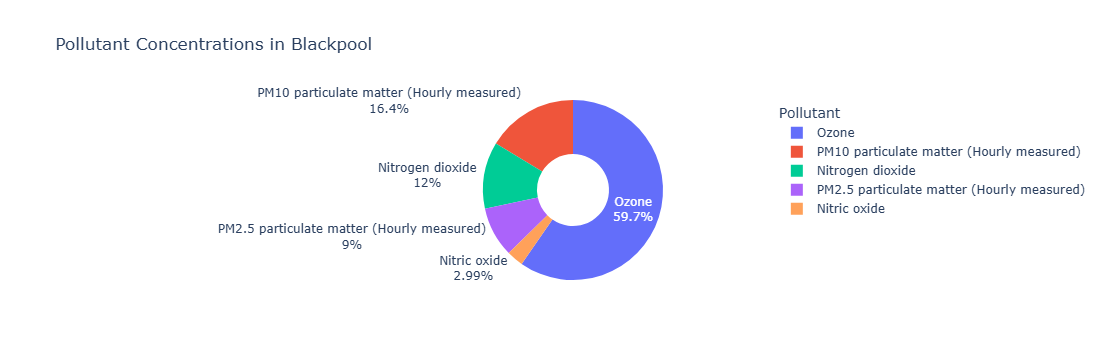

In [71]:
# Define pollutants and their colors
pollutants = ['Ozone','Nitric oxide', 'Nitrogen dioxide', 'PM10 particulate matter (Hourly measured)', 'PM2.5 particulate matter (Hourly measured)']
pollutant_colors = px.colors.qualitative.Plotly

# Calculate the sum of pollutant concentrations
total_concentrations = data[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})

# Create a donut plot for pollutant concentrations
fig = px.pie(concentration_data, names="Pollutant", values="Concentration",
             title="Pollutant Concentrations in Blackpool",
             hole=0.4, color_discrete_sequence=pollutant_colors)

# Update layout for the donut plot
fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="Pollutant")

# Show the donut plot
fig.show()